# Malcolm MacLeod

## Research question/interests

My research interests revolve around what seasonal variations exist on Mars. I will look at the temperature, pressure and 
solar longtitude (ls) which helps determine the solstices and equinoxs. Looking at the the temperature variations throughout Mar's year, I want to see if the temperatures decline or rise when nearing summer and winter parts of the year. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/mars-weather.csv")

In [4]:
df

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [5]:
df.shape

(1894, 10)

In [6]:
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [8]:
df.nunique(axis=0)

id                  1894
terrestrial_date    1894
sol                 1894
ls                   360
month                 12
min_temp              29
max_temp              46
pressure             199
wind_speed             0
atmo_opacity           2
dtype: int64

In [9]:
df.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


In [10]:
df.atmo_opacity.unique

<bound method Series.unique of 0       Sunny
1       Sunny
2       Sunny
3       Sunny
4       Sunny
        ...  
1889    Sunny
1890    Sunny
1891    Sunny
1892    Sunny
1893    Sunny
Name: atmo_opacity, Length: 1894, dtype: object>

In [19]:
df_cleaned = df.copy().drop(['atmo_opacity','wind_speed','id'], axis=1)

In [22]:
df_cleaned.rename(columns={"terrestrial_date":"earth_date"})

,earth_date,sol,ls,month,min_temp,max_temp,pressure
0,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0
1,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0
2,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0
3,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0
4,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0
...,...,...,...,...,...,...,...
1889,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0
1890,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0
1891,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0
1892,2012-08-15,9,155,Month 6,NaN,NaN,NaN


In [23]:
df_cleaned.dropna(axis=0)

,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure
0,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0
1,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0
2,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0
3,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0
4,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0
...,...,...,...,...,...,...,...
1887,2012-08-20,14,157,Month 6,-74.0,-16.0,740.0
1888,2012-08-19,13,157,Month 6,-74.0,-15.0,732.0
1889,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0
1890,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0


In [25]:
df_cleaned.shape

(1894, 7)

<AxesSubplot:>

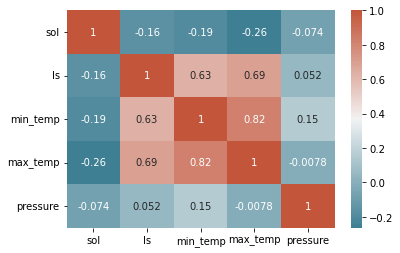

In [26]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='ls', ylabel='min_temp'>

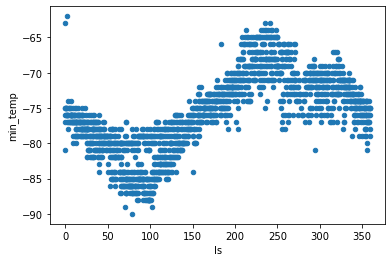

In [27]:
df_cleaned.plot(kind = 'scatter', x= 'ls', y='min_temp')